### ScatterPlot

/tmp/ipykernel_9519/757267848.py:18: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data = data.groupby('MetaEquipo').sum().reset_index()


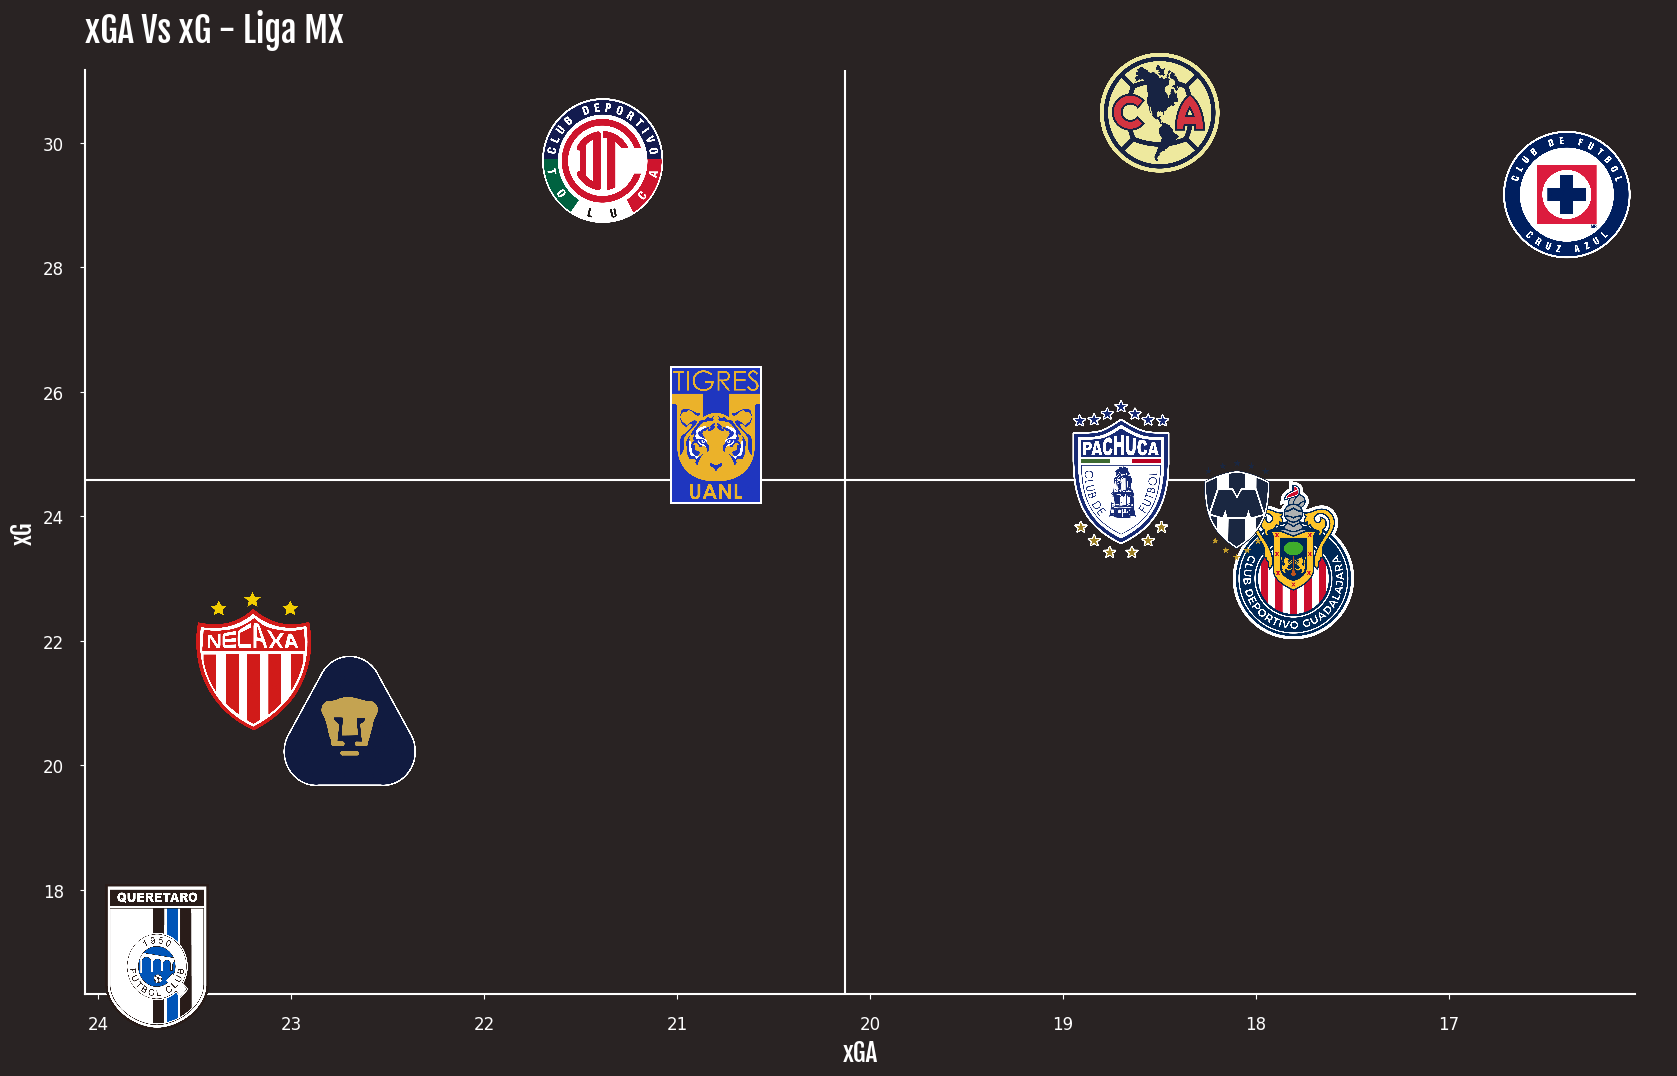

In [45]:
from utils import *
import pandas as pd
# xvars = ['xG','xGA', 'GF','GA']

df = pd.read_csv("data/csvdata/scores_and_fixtures.csv").iloc[:,1:]
season_stages = ['Clausura','Liguilla']
temporada = '2023-2024'
columns = ['MetaEquipo', 'SeasonStage', 
                   'xG','xGA', 'GF','GA'
                   ]

repechaje = ['America', 'Cruz_Azul', 'Guadalajara',
       'Monterrey', 'Pachuca', 'Pumas_UNAM', 'Queretaro',
        'Toluca', 'UANL', 'Necaxa']
# df.MetaEquipo.unique()
data = df[(df.Temporada == temporada) & (df.SeasonStage.isin(season_stages))
          & (df.MetaEquipo.isin(repechaje)) & (df.Date > '2024-01-01')].dropna(subset={'Result'})[columns]
data = data.groupby('MetaEquipo').sum().reset_index()
make_scatter_team_plot(data, 
    xcolumn='xGA',
    ycolumn= 'xG', 
    title="", 
    xlabel='xGA', ylabel='xG', zoom=0.093)

##Plot chido

In [726]:
from utils import *
import pandas as pd
df = pd.read_csv('data/csvdata/scores_and_fixtures.csv').iloc[:,1:]
df['game_counter'] = 1
df['is_win'] = df.apply(lambda row: 1 if row['Result'] == 'W' else 0, axis=1)
df['is_draw'] = df.apply(lambda row: 1 if row['Result'] == 'D' else 0, axis=1)
df['is_loss'] = df.apply(lambda row: 1 if row['Result'] == 'L' else 0, axis=1)
df['is_home_game'] = df.apply(lambda row: 1 if row['Venue'] == 'Home' else 0, axis=1)
df['is_away_game'] = df.apply(lambda row: 1 if row['is_home_game'] == 0 else 0, axis=1)

df['is_win_home'] = df.apply(lambda row: 1 if (row['Result'] == 'W') & (row['Venue'] == 'Home') else 0, axis=1)
df['is_draw_home'] = df.apply(lambda row: 1 if (row['Result'] == 'D') & (row['Venue'] == 'Home') else 0, axis=1)
df['is_loss_home'] = df.apply(lambda row: 1 if (row['Result'] == 'L') & (row['Venue'] == 'Home') else 0, axis=1)

df['is_win_away'] = df.apply(lambda row: 1 if (row['Result'] == 'W') & (row['Venue'] == 'Away') else 0, axis=1)
df['is_draw_away'] = df.apply(lambda row: 1 if (row['Result'] == 'D') & (row['Venue'] == 'Away') else 0, axis=1)
df['is_loss_away'] = df.apply(lambda row: 1 if (row['Result'] == 'L') & (row['Venue'] == 'Away') else 0, axis=1)

df['home_goals'] = df.apply(lambda row: row['GF'] if row['Venue'] == 'Home' else row['GA'], axis=1)
df['away_goals'] = df.apply(lambda row: row['GF'] if row['Venue'] == 'Away' else row['GA'], axis=1)

df['is_over'] = df.apply(lambda row: 1 if row['TotalGoals'] > 2.5 else 0, axis=1)
df['is_AA'] = df.apply(lambda row: 1 if ((row['GF'] >= 1) & (row['GA'] >= 1)) else 0, axis=1)

df['is_over_home'] = df.apply(lambda row: 1 if ((row['is_over'] == 1) & (row['Venue'] == 'Home')) else 0, axis=1)
df['is_AA_home'] = df.apply(lambda row: 1 if ((row['GF'] >= 1) & (row['GA'] >= 1)& (row['Venue'] == 'Home')) else 0, axis=1)

df['is_over_away'] = df.apply(lambda row: 1 if ((row['is_over'] == 1) & (row['Venue'] == 'Away')) else 0, axis=1)
df['is_AA_away'] = df.apply(lambda row: 1 if ((row['GF'] >= 1) & (row['GA'] >= 1)& (row['Venue'] == 'Away')) else 0, axis=1)

grouping_columns = ['Temporada', 'Jornada', 'SeasonStage']
columns = grouping_columns + ['GF', 'GA', 'xG', 'xGA', 'TotalGoals','is_win', 'is_draw', 'is_loss',
                               'is_win_home', 'is_draw_home', 'is_loss_home', 'is_win_away',
                               'is_draw_away', 'is_loss_away', 'home_goals', 'away_goals',
                               'is_over', 'is_AA', 'is_over_home', 'is_AA_home', 'is_over_away', 'is_AA_away', 
                               'is_home_game', 'is_away_game', 'game_counter']

df = df[['MetaEquipo', 'Opponent','Season Type', 'Date', 'Venue', 'Result','Expected_Results'] + columns]
df = df[~df.Opponent.isin(['Sinaloa', 'Veracruz', 'Morelia', 'Chiapas', 'Lobos BUAP'])]
# tablita_por_jornada = df[columns].groupby(by=grouping_columns).sum().reset_index()
df['Jornada'] = df[(df['Season Type'] == 'Regular Season') & (df['SeasonStage'].isin(['Clausura', 'Apertura']))].groupby(['MetaEquipo', 'Temporada', 'SeasonStage'])['Date'].rank(method='dense', ascending=True).astype(int)
df['Jornada'] = df['Jornada'].fillna("-")
df.shape

(5082, 35)

In [727]:
def add_current_points(df):
    # Ordena los datos por temporada, seasonstage, Jornada y fecha para asegurar un orden correcto
    df.sort_values(by=['Temporada', 'SeasonStage', 'MetaEquipo', 'Jornada', 'Date'], inplace=True)
    # Inicializa las columnas 'current_points', 'current_wins' y 'current_goals' en NaN (espacios vacíos)
    df['current_points'] = ''
    df['current_points_home'] = ''
    df['current_points_away'] = ''
    df['current_exp_points'] = ''
    df['current_exp_points_home'] = ''
    df['current_exp_points_away'] = ''
    df['current_wins'] = ''
    df['current_wins_home'] = ''
    df['current_wins_away'] = ''
    df['current_draws'] = ''
    df['current_draws_home'] = ''
    df['current_draws_away'] = ''
    df['current_losses'] = ''
    df['current_losses_home'] = ''
    df['current_losses_away'] = ''
    df['current_goals'] = ''
    df['current_goals_home'] = ''
    df['current_goals_away'] = ''
    df['current_exp_goals'] = ''
    df['current_exp_goals_away'] = ''
    df['current_exp_goals_home'] = ''
    df['current_goals_against'] = ''
    df['current_goals_against_home'] = ''
    df['current_goals_against_away'] = ''
    df['current_exp_goals_against'] = ''
    df['current_exp_goals_against_home'] = ''
    df['current_exp_goals_against_away'] = ''
    df['current_ranking_points'] = ''
    df['current_ranking_points_home'] = ''
    df['current_ranking_points_away'] = ''
    df['current_ranking_wins'] = ''
    df['current_ranking_wins_home'] = ''
    df['current_ranking_wins_away'] = ''
    df['current_ranking_goals'] = ''
    df['current_ranking_goals_home'] = ''
    df['current_ranking_goals_away'] = ''
    df['current_ranking_score'] = ''
    df['current_ranking_score_home'] = ''
    df['current_ranking_score_away'] = ''
    df['current_goals_difference'] = ''
    df['current_goals_difference_home'] = ''
    df['current_goals_difference_away'] = ''
    df['ranking'] = ''
    df['partidos_jugados'] = ''
    df['partidos_jugados_home'] = ''
    df['partidos_jugados_away'] = ''


    temporadas = df.Temporada.unique().tolist()
    temporadas.remove("2020-2021")
    stages = ['Apertura','Clausura']
    jornadas = list(range(18))

    for temp in temporadas:
        for stage in stages:
            puntos_acumulados = {}
            puntos_acumulados_home = {}
            puntos_acumulados_away = {}
            exp_puntos_acumulados = {}
            exp_puntos_acumulados_home = {}
            exp_puntos_acumulados_away = {}
            wins_acumulados = {}
            wins_acumulados_home = {}
            wins_acumulados_away = {}
            draws_acumulados = {}
            draws_acumulados_home = {}
            draws_acumulados_away = {}
            losses_acumulados = {}
            losses_acumulados_home = {}
            losses_acumulados_away = {}
            goals_acumulados = {}
            goals_acumulados_home = {}
            goals_acumulados_away = {}
            exp_goals_acumulados = {}
            exp_goals_acumulados_home = {}
            exp_goals_acumulados_away = {}
            goals_against_acumulados = {}
            goals_against_acumulados_home = {}
            goals_against_acumulados_away = {}
            exp_goals_against_acumulados = {}
            exp_goals_against_acumulados_home = {}
            exp_goals_against_acumulados_away = {}
            diferencia_goles_acumulados = {}
            diferencia_goles_acumulados_home = {}
            diferencia_goles_acumulados_away = {}
            partidos_jugados = {}
            partidos_jugados_home = {}
            partidos_jugados_away = {}
            sample = df[(df.Temporada == temp) & (df.SeasonStage == stage)].sort_values(by='Date')
            
            for index, row in sample.iterrows():
                equipo = row['MetaEquipo']

                # Verifica si el equipo ya está en el diccionario de puntos acumulados
                if equipo not in puntos_acumulados:
                    puntos_acumulados[equipo] = 0
                    puntos_acumulados_home[equipo] = 0
                    puntos_acumulados_away[equipo] = 0
                    exp_puntos_acumulados[equipo] = 0
                    exp_puntos_acumulados_home[equipo] = 0
                    exp_puntos_acumulados_away[equipo] = 0
                    wins_acumulados[equipo] = 0
                    wins_acumulados_home[equipo] = 0
                    wins_acumulados_away[equipo] = 0
                    draws_acumulados[equipo] = 0
                    draws_acumulados_home[equipo] = 0
                    draws_acumulados_away[equipo] = 0
                    losses_acumulados[equipo] = 0
                    losses_acumulados_home[equipo] = 0
                    losses_acumulados_away[equipo] = 0
                    goals_acumulados[equipo] = 0
                    goals_acumulados_home[equipo] = 0
                    goals_acumulados_away[equipo] = 0
                    exp_goals_acumulados[equipo] = 0
                    exp_goals_acumulados_home[equipo] = 0
                    exp_goals_acumulados_away[equipo] = 0
                    goals_against_acumulados[equipo] = 0
                    goals_against_acumulados_home[equipo] = 0
                    goals_against_acumulados_away[equipo] = 0
                    exp_goals_against_acumulados[equipo] = 0
                    exp_goals_against_acumulados_home[equipo] = 0
                    exp_goals_against_acumulados_away[equipo] = 0
                    diferencia_goles_acumulados[equipo] = 0
                    diferencia_goles_acumulados_home[equipo] = 0
                    diferencia_goles_acumulados_away[equipo] = 0
                    partidos_jugados[equipo] = 0
                    partidos_jugados_home[equipo] = 0
                    partidos_jugados_away[equipo] = 0

                # Asigna los puntos según el resultado del partido
                if row['Venue'] == 'Home':
                    partidos_jugados_home[equipo] += 1
                    goals_acumulados_home[equipo] += row['GF']
                    goals_against_acumulados_home[equipo] += row['GA']
                    exp_goals_acumulados_home[equipo] += row['xG']
                    exp_goals_against_acumulados_home[equipo] += row['xGA']
                    diferencia_goles_acumulados_home[equipo] += row['GF'] - row['GA']
                else:
                    partidos_jugados_away[equipo] += 1
                    goals_acumulados_away[equipo] += row['GF']
                    goals_against_acumulados_away[equipo] += row['GA']
                    exp_goals_acumulados_away[equipo] += row['xG']
                    exp_goals_against_acumulados_away[equipo] += row['xGA']
                    diferencia_goles_acumulados_away[equipo] += row['GF'] - row['GA']

                if row['Result'] == 'W':
                    puntos_acumulados[equipo] += 3
                    wins_acumulados[equipo] += 1
                    if row['Venue'] == 'Home':
                        puntos_acumulados_home[equipo] += 3
                        wins_acumulados_home[equipo] += 1
                        
                    else:
                        puntos_acumulados_away[equipo] += 3
                        wins_acumulados_away[equipo] += 1


                elif row['Result'] == 'D':
                    puntos_acumulados[equipo] += 1
                    draws_acumulados[equipo] += 1
                    if row['Venue'] == 'Home':
                        puntos_acumulados_home[equipo] += 1
                        draws_acumulados_home[equipo] += 1
                    else:
                        puntos_acumulados_away[equipo] += 1
                        draws_acumulados_away[equipo] += 1
                else:
                    losses_acumulados[equipo] += 1
                    if row['Venue'] == 'Home':
                        losses_acumulados_home[equipo] += 1
                    else:
                        losses_acumulados_away[equipo] += 1
                
                if row['Expected_Results'] == "W":
                    exp_puntos_acumulados[equipo] += 3
                    if row['Venue'] == 'Home':
                        exp_puntos_acumulados_home[equipo] += 3
                    else:
                        exp_puntos_acumulados_away[equipo] += 3
                elif row['Expected_Results'] == "D":
                    exp_puntos_acumulados[equipo] += 1
                    if row['Venue'] == 'Home':
                        exp_puntos_acumulados_home[equipo] += 1
                    else:
                        exp_puntos_acumulados_away[equipo] += 1

                # Suma los goles
                partidos_jugados[equipo] += 1
                goals_acumulados[equipo] += row['GF']
                exp_goals_acumulados[equipo] += row['xG']
                goals_against_acumulados[equipo] += row['GA']
                exp_goals_against_acumulados[equipo] += row['xGA']
                diferencia_goles_acumulados[equipo] += row['GF'] - row['GA']

                # Asigna los valores acumulados a las columnas correspondientes
                sample.at[index, 'current_points'] = puntos_acumulados[equipo]
                sample.at[index, 'current_points_home'] = puntos_acumulados_home[equipo]
                sample.at[index, 'current_points_away'] = puntos_acumulados_away[equipo]
                sample.at[index, 'current_exp_points'] = exp_puntos_acumulados[equipo]
                sample.at[index, 'current_exp_points_home'] = exp_puntos_acumulados_home[equipo]
                sample.at[index, 'current_exp_points_away'] = exp_puntos_acumulados_away[equipo]
                sample.at[index, 'current_wins'] = wins_acumulados[equipo]
                sample.at[index, 'current_wins_home'] = wins_acumulados_home[equipo]
                sample.at[index, 'current_wins_away'] = wins_acumulados_away[equipo]
                sample.at[index, 'current_draws'] = draws_acumulados[equipo]
                sample.at[index, 'current_draws_home'] = draws_acumulados_home[equipo]
                sample.at[index, 'current_draws_away'] = draws_acumulados_away[equipo]
                sample.at[index, 'current_losses'] = losses_acumulados[equipo]
                sample.at[index, 'current_losses_home'] = losses_acumulados_home[equipo]
                sample.at[index, 'current_losses_away'] = losses_acumulados_away[equipo]
                sample.at[index, 'current_goals'] = goals_acumulados[equipo]
                sample.at[index, 'current_goals_home'] = goals_acumulados_home[equipo]
                sample.at[index, 'current_goals_away'] = goals_acumulados_away[equipo]
                sample.at[index, 'current_exp_goals'] = exp_goals_acumulados[equipo]
                sample.at[index, 'current_exp_goals_home'] = exp_goals_acumulados_home[equipo]
                sample.at[index, 'current_exp_goals_away'] = exp_goals_acumulados_away[equipo]
                sample.at[index, 'current_goals_against'] = goals_against_acumulados[equipo]
                sample.at[index, 'current_goals_against_home'] = goals_against_acumulados_home[equipo]
                sample.at[index, 'current_goals_against_away'] = goals_against_acumulados_away[equipo]
                sample.at[index, 'current_exp_goals_against'] = exp_goals_against_acumulados[equipo]
                sample.at[index, 'current_exp_goals_against_home'] = exp_goals_against_acumulados_home[equipo]
                sample.at[index, 'current_exp_goals_against_away'] = exp_goals_against_acumulados_away[equipo]
                sample.at[index, 'current_goals_difference'] = diferencia_goles_acumulados[equipo]
                sample.at[index, 'current_goals_difference_home'] = diferencia_goles_acumulados_home[equipo]
                sample.at[index, 'current_goals_difference_away'] = diferencia_goles_acumulados_away[equipo]
                sample.at[index, 'partidos_jugados'] = partidos_jugados[equipo]
                sample.at[index, 'partidos_jugados_home'] = partidos_jugados_home[equipo]
                sample.at[index, 'partidos_jugados_away'] = partidos_jugados_away[equipo]
            

            for jornada in jornadas:
                subsample = sample[sample.Jornada == jornada]
                subsample.sort_values(by=['current_points','current_goals_difference','current_goals'], inplace=True, ascending=False)
                subsample['ranking'] = range(1,len(subsample) + 1)
                sample.loc[subsample.index] = subsample
                
            df.loc[sample.index] = sample
    
    name_mapping = {
    'America' : 'América',
    'Atlas' : 'Atlas',
    'Atletico' : 'Atlético',
    'Cruz_Azul' : 'Cruz Azul',
    'FC_Juarez' : 'FC Juárez',
    'Guadalajara' : 'Guadalajara',
    'Leon' : 'León',
    'Mazatlan' : 'Mazatlán',
    'Monterrey' : 'Monterrey',
    'Necaxa' : 'Necaxa',
    'Pachuca' : 'Pachuca',
    'Puebla' : 'Puebla',
    'Pumas_UNAM' : 'UNAM',
    'Queretaro' : 'Querétaro',
    'Santos_Laguna' : 'Santos',
    'Tijuana' : 'Tijuana',
    'Toluca' : 'Toluca',
    'UANL' : 'UANL',
}


    aux_df = df[['Date','MetaEquipo','ranking']]
    aux_df = aux_df.rename(columns={'MetaEquipo':'Opponent', 'ranking':'opponent_ranking'})
    aux_df['Opponent'] = aux_df['Opponent'].apply(lambda x: name_mapping[x])

    df = df.merge(aux_df, on=['Date','Opponent'], how='left')
    return df

In [728]:
df = add_current_points(df)

/tmp/ipykernel_13245/4175520552.py:237: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subsample.sort_values(by=['current_points','current_goals_difference','current_goals'], inplace=True, ascending=False)
/tmp/ipykernel_13245/4175520552.py:237: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subsample.sort_values(by=['current_points','current_goals_difference','current_goals'], inplace=True, ascending=False)
/tmp/ipykernel_13245/4175520552.py:238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docu

In [729]:
# df = df[(df['SeasonStage'].isin(['Clausura', 'Apertura'])) & 
#    (df['Season Type'].isin(['Regular Season']))]

# # df = df[~((df.Temporada == '2023-2024')&(df.SeasonStage == 'Clausura'))]
df = df[~((df.Temporada == '2019-2020')&(df.SeasonStage == 'Clausura'))]
# df[df.MetaEquipo == 'UANL'].Jornada.unique()
df['Opponent'] = df['Opponent'].apply(lambda x: inverse_name_mapping[x])


In [730]:
df['game_index'] = df.apply(lambda row: row['Temporada'] + "-" + row['SeasonStage'] + "-" +str(row['Jornada']), axis=1)
df['game_index'] = df.apply(lambda row: row['game_index'] + "-" + row['MetaEquipo'] + "-" + row['Opponent'] 
                       if row['MetaEquipo'] < row['Opponent'] else 
                       row['game_index'] + "-" + row['Opponent'] + "-" + row['MetaEquipo'], axis=1)


In [731]:
df = df.groupby('game_index').first().reset_index()

In [718]:
grouping_columns = ['Temporada', 'Jornada', 'SeasonStage','MetaEquipo']
columns = grouping_columns + ['GF','GA', 'xG', 'xGA','is_win', 'is_draw', 'is_loss', 'is_over', 'is_AA',
                               'is_win_home', 'is_draw_home', 'is_loss_home', 'is_win_away',
                               'is_draw_away', 'is_loss_away', 'home_goals', 'away_goals', 
                               'is_home_game', 'is_away_game','game_counter','is_over_home',
                               'is_AA_home', 'is_over_away', 'is_AA_away']
df_by_team = df[columns].groupby(by=grouping_columns).sum().reset_index()

# tbd_df[(tbd_df.SeasonStage == 'Clausura')  & (tbd_df.Temporada == '2023-2024')]

In [732]:
grouping_columns = ['Temporada', 'Jornada', 'SeasonStage']
columns = grouping_columns + ['TotalGoals','is_win', 'is_draw', 'is_loss', 'is_home_game'
                              , 'is_away_game','game_counter', 'is_over', 'is_AA',
                               'is_win_home', 'is_draw_home', 'is_loss_home', 'is_win_away',
                               'is_draw_away', 'is_loss_away', 'home_goals', 
                               'away_goals','is_over_home',
                               'is_AA_home', 'is_over_away', 'is_AA_away']
df_by_season = df[columns].groupby(by=grouping_columns).sum().reset_index()
df_by_season['is_win_norm'] = df_by_season.apply(lambda row: row['is_win'] / row['game_counter'], axis=1)
df_by_season['is_loss_norm'] = df_by_season.apply(lambda row: row['is_loss'] / row['game_counter'], axis=1)
df_by_season['is_draw_norm'] = df_by_season.apply(lambda row: row['is_draw'] / row['game_counter'], axis=1)
df_by_season['is_over_norm'] = df_by_season.apply(lambda row: row['is_over'] / row['game_counter'], axis=1)
df_by_season['is_AA_norm'] = df_by_season.apply(lambda row: row['is_AA'] / row['game_counter'], axis=1)

df_by_season['is_win_home_norm'] = df_by_season.apply(lambda row: row['is_win_home'] / row['is_home_game'], axis=1)
df_by_season['is_loss_home_norm'] = df_by_season.apply(lambda row: row['is_loss_home'] / row['is_home_game'], axis=1)
df_by_season['is_draw_home_norm'] = df_by_season.apply(lambda row: row['is_draw_home'] / row['is_home_game'], axis=1)
df_by_season['is_over_home_norm'] = df_by_season.apply(lambda row: row['is_over_home'] / row['is_home_game'], axis=1)
df_by_season['is_AA_home_norm'] = df_by_season.apply(lambda row: row['is_AA_home'] / row['is_home_game'], axis=1)

df_by_season['is_win_away_norm'] = df_by_season.apply(lambda row: row['is_win_away'] / row['is_away_game'], axis=1)
df_by_season['is_loss_away_norm'] = df_by_season.apply(lambda row: row['is_loss_away'] / row['is_away_game'], axis=1)
df_by_season['is_draw_away_norm'] = df_by_season.apply(lambda row: row['is_draw_away'] / row['is_away_game'], axis=1)
df_by_season['is_over_away_norm'] = df_by_season.apply(lambda row: row['is_over_away'] / row['is_away_game'], axis=1)
df_by_season['is_AA_away_norm'] = df_by_season.apply(lambda row: row['is_AA_away'] / row['is_away_game'], axis=1)

df_by_season.to_csv('data_by_season.csv')


In [585]:
# df_by_team.to_csv('data_by_team.csv')
# df_by_season.to_csv('data_by_season.csv')

In [672]:
df_by_season[(df_by_season.Temporada == '2023-2024') & (df_by_season.SeasonStage == 'Clausura')]

,Temporada,Jornada,SeasonStage,TotalGoals,is_win,is_draw,is_loss,is_home_game,is_away_game,game_counter,...,is_win_home_norm,is_loss_home_norm,is_draw_home_norm,is_over_home_norm,is_AA_home_norm,is_win_away_norm,is_loss_away_norm,is_draw_away_norm,is_over_away_norm,is_AA_away_norm
211,2023-2024,1.0,Clausura,19.0,3,2,4,5,4,9,...,0.111111,0.222222,0.222222,0.222222,0.333333,0.222222,0.222222,0.000000,0.111111,0.111111
213,2023-2024,2.0,Clausura,26.0,5,2,3,4,6,10,...,0.300000,0.000000,0.100000,0.200000,0.200000,0.200000,0.300000,0.100000,0.300000,0.300000
215,2023-2024,3.0,Clausura,37.0,5,5,2,8,4,12,...,0.333333,0.083333,0.250000,0.416667,0.583333,0.083333,0.083333,0.166667,0.166667,0.250000
217,2023-2024,4.0,Clausura,43.0,3,4,5,5,7,12,...,0.250000,0.000000,0.166667,0.250000,0.333333,0.000000,0.416667,0.166667,0.500000,0.416667
219,2023-2024,5.0,Clausura,39.0,3,3,4,5,5,10,...,0.200000,0.100000,0.200000,0.300000,0.300000,0.100000,0.300000,0.100000,0.500000,0.500000
221,2023-2024,6.0,Clausura,28.0,2,2,5,3,6,9,...,0.111111,0.111111,0.111111,0.333333,0.222222,0.111111,0.444444,0.111111,0.333333,0.222222
223,2023-2024,7.0,Clausura,28.0,2,5,4,6,5,11,...,0.090909,0.181818,0.272727,0.272727,0.181818,0.090909,0.181818,0.181818,0.272727,0.272727
225,2023-2024,8.0,Clausura,31.0,4,2,7,5,8,13,...,0.076923,0.153846,0.153846,0.153846,0.153846,0.230769,0.384615,0.000000,0.230769,0.153846
227,2023-2024,9.0,Clausura,30.0,5,3,4,6,6,12,...,0.416667,0.000000,0.083333,0.083333,0.166667,0.000000,0.333333,0.166667,0.250000,0.333333
229,2023-2024,10.0,Clausura,36.0,7,3,1,9,2,11,...,0.545455,0.090909,0.181818,0.636364,0.454545,0.090909,0.000000,0.090909,0.090909,0.181818


In [719]:
df_by_team[(df_by_team.MetaEquipo == 'UANL') & (df_by_team.Jornada == 15)& (df_by_team.SeasonStage == 'Clausura')]

,Temporada,Jornada,SeasonStage,MetaEquipo,GF,GA,xG,xGA,is_win,is_draw,...,is_loss_away,home_goals,away_goals,is_home_game,is_away_game,game_counter,is_over_home,is_AA_home,is_over_away,is_AA_away
2540,2021-2022,15.0,Clausura,UANL,0.0,2.0,1.1,0.7,0,0,...,1,2.0,0.0,0,1,1,0,0,0,0
3176,2022-2023,15.0,Clausura,UANL,0.0,0.0,0.5,1.1,0,1,...,0,0.0,0.0,0,1,1,0,0,0,0
3812,2023-2024,15.0,Clausura,UANL,3.0,3.0,1.8,2.6,0,1,...,0,3.0,3.0,0,1,1,0,0,1,1


In [720]:
df_by_team.columns

Index(['Temporada', 'Jornada', 'SeasonStage', 'MetaEquipo', 'GF', 'GA', 'xG',
       'xGA', 'is_win', 'is_draw', 'is_loss', 'is_over', 'is_AA',
       'is_win_home', 'is_draw_home', 'is_loss_home', 'is_win_away',
       'is_draw_away', 'is_loss_away', 'home_goals', 'away_goals',
       'is_home_game', 'is_away_game', 'game_counter', 'is_over_home',
       'is_AA_home', 'is_over_away', 'is_AA_away'],
      dtype='object')

In [721]:
def normalized_value_counts(series):
    return series.sum()/len(series)

df_by_team = df_by_team[df_by_team.Temporada != '2019-2020']
df_by_team = df_by_team[~((df_by_team.Temporada == '2023-2024') & (df_by_team.SeasonStage == 'Clausura'))]
df_by_team = df_by_team[df_by_team.Jornada != '-']
df_by_team = df_by_team.groupby(
        by=['Jornada','MetaEquipo']).agg({
    'GF':'mean',
    'GA':'mean',
    'xG':'mean',
    'xGA':'mean',
    'game_counter':'sum',
    'is_home_game':'sum',
    'is_away_game':'sum',
    'is_win' : 'sum',
    'is_loss' : 'sum',
    'is_draw' : 'sum',
    'is_win_home' : 'sum',
    'is_loss_home' : 'sum',
    'is_draw_home' : 'sum',
    'is_win_away' : 'sum',
    'is_loss_away' : 'sum',
    'is_draw_away' : 'sum',
    'is_over' : 'sum',
    'is_AA' : 'sum',
    'is_over_home' : 'sum',
    'is_AA_home' : 'sum',
    'is_over_away' : 'sum',
    'is_AA_away' : 'sum',


}).reset_index()

df_by_team['is_win_norm'] = df_by_team.apply(lambda row: row['is_win'] / row['game_counter'] if row['game_counter'] > 0 else 0, axis=1)
df_by_team['is_loss_norm'] = df_by_team.apply(lambda row: row['is_loss'] / row['game_counter'] if row['game_counter'] > 0 else 0, axis=1)
df_by_team['is_draw_norm'] = df_by_team.apply(lambda row: row['is_draw'] / row['game_counter'] if row['game_counter'] > 0 else 0, axis=1)
df_by_team['is_over_norm'] = df_by_team.apply(lambda row: row['is_over'] / row['game_counter'] if row['game_counter'] > 0 else 0, axis=1)
df_by_team['is_AA_norm'] = df_by_team.apply(lambda row: row['is_AA'] / row['game_counter'] if row['game_counter'] > 0 else 0, axis=1)

df_by_team['is_win_home_norm'] = df_by_team.apply(lambda row: row['is_win_home'] / row['is_home_game'] if row['is_home_game'] > 0 else 0, axis=1)
df_by_team['is_loss_home_norm'] = df_by_team.apply(lambda row: row['is_loss_home'] / row['is_home_game'] if row['is_home_game'] > 0 else 0, axis=1)
df_by_team['is_draw_home_norm'] = df_by_team.apply(lambda row: row['is_draw_home'] / row['is_home_game'] if row['is_home_game'] > 0 else 0, axis=1)
df_by_team['is_over_home_norm'] = df_by_team.apply(lambda row: row['is_over_home'] / row['is_home_game'] if row['is_home_game'] > 0 else 0, axis=1)
df_by_team['is_AA_home_norm'] = df_by_team.apply(lambda row: row['is_AA_home'] / row['is_home_game'] if row['is_home_game'] > 0 else 0, axis=1)

df_by_team['is_win_away_norm'] = df_by_team.apply(lambda row: row['is_win_away'] / row['is_away_game'] if row['is_away_game'] > 0 else 0, axis=1)
df_by_team['is_loss_away_norm'] = df_by_team.apply(lambda row: row['is_loss_away'] / row['is_away_game'] if row['is_away_game'] > 0 else 0, axis=1)
df_by_team['is_draw_away_norm'] = df_by_team.apply(lambda row: row['is_draw_away'] / row['is_away_game'] if row['is_away_game'] > 0 else 0, axis=1)
df_by_team['is_over_away_norm'] = df_by_team.apply(lambda row: row['is_over_away'] / row['is_away_game'] if row['is_away_game'] > 0 else 0, axis=1)
df_by_team['is_AA_away_norm'] = df_by_team.apply(lambda row: row['is_AA_away'] / row['is_away_game'] if row['is_away_game'] > 0 else 0, axis=1)

# columns = list(set(list(df_by_team)) - set(['game_counter', 'is_home_game', 'is_away_game']))
df_by_team.to_csv('data_by_team.csv')
# columns


In [704]:
df_by_team[(df_by_team.MetaEquipo == 'UANL')]

,Jornada,MetaEquipo,GF,GA,xG,xGA,game_counter,is_home_game,is_away_game,is_win,...,is_win_home_norm,is_loss_home_norm,is_draw_home_norm,is_over_home_norm,is_AA_home_norm,is_win_away_norm,is_loss_away_norm,is_draw_away_norm,is_over_away_norm,is_AA_away_norm
17,1.0,UANL,1.461538,0.923077,0.761538,0.700000,13,6,7,4,...,0.153846,0.153846,0.153846,0.153846,0.153846,0.153846,0.153846,0.230769,0.307692,0.307692
35,2.0,UANL,1.384615,1.153846,0.869231,0.638462,13,6,7,5,...,0.230769,0.076923,0.153846,0.230769,0.230769,0.153846,0.153846,0.230769,0.230769,0.307692
53,3.0,UANL,1.384615,0.846154,0.492308,0.476923,13,7,6,6,...,0.307692,0.076923,0.153846,0.153846,0.307692,0.153846,0.153846,0.153846,0.230769,0.230769
71,4.0,UANL,1.461538,1.076923,0.961538,0.684615,13,7,6,6,...,0.230769,0.230769,0.076923,0.307692,0.307692,0.230769,0.076923,0.153846,0.230769,0.230769
89,5.0,UANL,1.923077,1.153846,0.869231,0.530769,13,5,8,8,...,0.384615,0.000000,0.000000,0.307692,0.230769,0.230769,0.307692,0.076923,0.307692,0.307692
107,6.0,UANL,2.307692,1.076923,0.892308,0.515385,13,8,5,10,...,0.538462,0.000000,0.076923,0.538462,0.615385,0.230769,0.000000,0.153846,0.153846,0.153846
125,7.0,UANL,1.538462,0.615385,1.184615,0.515385,13,6,7,8,...,0.307692,0.000000,0.153846,0.230769,0.230769,0.307692,0.153846,0.076923,0.076923,0.076923
143,8.0,UANL,1.000000,0.692308,0.784615,0.761538,13,9,4,5,...,0.307692,0.076923,0.307692,0.230769,0.153846,0.076923,0.153846,0.076923,0.000000,0.076923
161,9.0,UANL,0.846154,0.846154,0.669231,0.584615,13,4,9,2,...,0.076923,0.153846,0.076923,0.153846,0.076923,0.076923,0.230769,0.384615,0.153846,0.230769
179,10.0,UANL,2.000000,0.692308,0.676923,0.546154,13,8,5,9,...,0.384615,0.076923,0.153846,0.384615,0.230769,0.307692,0.000000,0.076923,0.076923,0.153846


In [636]:
tbd.MetaEquipo.unique()

array(['America', 'Atlas', 'Atletico', 'Cruz_Azul', 'FC_Juarez',
       'Guadalajara', 'Leon', 'Mazatlan', 'Monterrey', 'Necaxa',
       'Pachuca', 'Puebla', 'Pumas_UNAM', 'Queretaro', 'Santos_Laguna',
       'Tijuana', 'Toluca', 'UANL'], dtype=object)

In [637]:
tbd[(tbd.MetaEquipo == 'UANL')]

,Jornada,MetaEquipo,GF,GA,xG,xGA,game_counter,is_home_game,is_away_game,is_win,is_loss,is_draw,is_over,is_AA,is_over_home,is_AA_home,is_over_away,is_AA_away
17,1.0,UANL,1.461538,0.923077,0.761538,0.700000,13,6,7,0.307692,0.307692,0.384615,0.461538,0.461538,0.153846,0.153846,0.307692,0.307692
35,2.0,UANL,1.384615,1.153846,0.869231,0.638462,13,6,7,0.384615,0.230769,0.384615,0.461538,0.538462,0.230769,0.230769,0.230769,0.307692
53,3.0,UANL,1.384615,0.846154,0.492308,0.476923,13,7,6,0.461538,0.230769,0.307692,0.384615,0.538462,0.153846,0.307692,0.230769,0.230769
71,4.0,UANL,1.461538,1.076923,0.961538,0.684615,13,7,6,0.461538,0.307692,0.230769,0.538462,0.538462,0.307692,0.307692,0.230769,0.230769
89,5.0,UANL,1.923077,1.153846,0.869231,0.530769,13,5,8,0.615385,0.307692,0.076923,0.615385,0.538462,0.307692,0.230769,0.307692,0.307692
107,6.0,UANL,2.307692,1.076923,0.892308,0.515385,13,8,5,0.769231,0.000000,0.230769,0.692308,0.769231,0.538462,0.615385,0.153846,0.153846
125,7.0,UANL,1.538462,0.615385,1.184615,0.515385,13,6,7,0.615385,0.153846,0.230769,0.307692,0.307692,0.230769,0.230769,0.076923,0.076923
143,8.0,UANL,1.000000,0.692308,0.784615,0.761538,13,9,4,0.384615,0.230769,0.384615,0.230769,0.230769,0.230769,0.153846,0.000000,0.076923
161,9.0,UANL,0.846154,0.846154,0.669231,0.584615,13,4,9,0.153846,0.384615,0.461538,0.307692,0.307692,0.153846,0.076923,0.153846,0.230769
179,10.0,UANL,2.000000,0.692308,0.676923,0.546154,13,8,5,0.692308,0.076923,0.230769,0.461538,0.384615,0.384615,0.230769,0.076923,0.153846


### Regular Season

Venue: Home and Away

In [ ]:
data

In [ ]:
import plotly.express as px
from PIL import Image


columns = ['Temporada','SeasonStage', 'Season Type', 'Jornada','MetaEquipo', 'Opponent','Venue', 'Result', 'GF', 'GA','xG', 'xGA',  'GoalsDifference',  'TotalGoals',
               'GF_>0 & GA_>0','current_points']
season_stages = ['Clausura']
metric = 'GF' #GA, xG, xGA, GF, GoalsDifference, TotalGoals, GF_>0 & GA_>0, win_rate, loss_rate, draw_rate
data = df[columns].copy()
data['Total games'] = 1
data['win_rate'] = data.apply(lambda row: 1 if row['Result'] == 'W' else 0, axis=1)
data['loss_rate'] = data.apply(lambda row: 1 if row['Result'] == 'L' else 0, axis=1)
data['draw_rate'] = data.apply(lambda row: 1 if row['Result'] == 'D' else 0, axis=1)
data = data[data.SeasonStage.isin(season_stages)].dropna(subset={'Jornada'})
grouping_columns = ['SeasonStage', 'Jornada', 'MetaEquipo']
data = data.groupby(by=grouping_columns).agg(
        {'GF':'mean', 'GA':'mean','xG':'mean', 'xGA':'mean',  'GoalsDifference':'mean',  'TotalGoals':'mean',
        'GF_>0 & GA_>0':'mean','win_rate':'mean', 'loss_rate':'mean', 'draw_rate':'mean', 'Total games':'sum'}).reset_index()

metaequipos = data.MetaEquipo.unique().tolist()[:2]
pdata = data[data.MetaEquipo.isin(metaequipos)].pivot_table(index=['Jornada'],columns='MetaEquipo', values=metric, aggfunc='sum')

fig = px.area(pdata, facet_col="MetaEquipo", facet_col_wrap=3, labels={'MetaEquipo':'', 'value':metric}, template="plotly_dark",)

# Add images above each facet
for i, team in enumerate(metaequipos):
    img_team_name = image_name_mapping[team]
    img_path = f'images/ligamx/{img_team_name}.png'
    if i == 0:
        a = 0.5
    else:
        b=-0.3
    with Image.open(img_path) as img:

        fig.add_layout_image(
            dict(
                source=img,
                xref="paper", yref="paper",
                x=(i+a) / len(metaequipos), y=0.9,
                sizex=0.3, sizey=0.3,
                xanchor="center", yanchor="bottom", 
            )
        )

# Show the plot
fig.show()


In [ ]:
import plotly.express as px
import matplotlib.pyplot as plt


fig = px.area(pdata, facet_col="MetaEquipo", facet_col_wrap=3, labels={'MetaEquipo':'Equipo', 'value':'GF'}, template="ggplot2")
fig.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from matplotlib.ticker import MultipleLocator

# Set dark brown background
plt.style.use('dark_background')
metaequipo_images = image_name_mapping

# Spread out MetaEquipos along the y-axis
num_metaequipos = len(metaequipo_images)
vertical_spacing = 3  # adjust this value to increase/decrease spacing

# Create a new figure
fig, ax = plt.subplots(figsize=(10, 6))

# Loop through MetaEquipos
for i, (metaequipo, img_team_name) in enumerate(metaequipo_images.items()):
    # Filter data for the current MetaEquipo
    image_path = f'images/ligamx/{img_team_name}.png'
    metaequipo_data = data[data['MetaEquipo'] == metaequipo]
    
    # Plot GF against Jornada for the current MetaEquipo, offsetting the y-axis for each
    ax.plot(metaequipo_data['Jornada'], metaequipo_data['GF'] + i * vertical_spacing, label=metaequipo)
    
    # Add MetaEquipo's image to the y-axis
    img = plt.imread(image_path)
    imagebox = OffsetImage(img, zoom=0.05)
    ab = AnnotationBbox(imagebox, (-1, i * vertical_spacing), frameon=False)
    ax.add_artist(ab)

# Set labels and legend
ax.set_xlabel('Jornada')
ax.set_ylabel('MetaEquipo')
ax.set_yticks([i * vertical_spacing for i in range(num_metaequipos)])
ax.set_yticklabels(metaequipo_images.keys())
ax.set_title('GF Time Series by MetaEquipo')
ax.legend()
# Set x-axis to display only integer values
ax.xaxis.set_major_locator(MultipleLocator(1))
plt.show()

Venue: Home

In [ ]:
columns = ['Temporada','SeasonStage', 'Season Type', 'Jornada','MetaEquipo', 'Opponent','Venue', 'Result', 'GF', 'GA','xG', 'xGA',  'GoalsDifference',  'TotalGoals',
               'GF_>0 & GA_>0','current_points']
season_stages = ['Apertura', 'Clausura', 'Guardianes']
venue = ['Home']
data = df[columns].copy()
data['Total games'] = 1
data['win_rate'] = data.apply(lambda row: 1 if row['Result'] == 'W' else 0, axis=1)
data['loss_rate'] = data.apply(lambda row: 1 if row['Result'] == 'L' else 0, axis=1)
data['draw_rate'] = data.apply(lambda row: 1 if row['Result'] == 'D' else 0, axis=1)
data = data[(data.SeasonStage.isin(season_stages)) & (data.Venue.isin(venue))].dropna(subset={'Jornada'})
grouping_columns = ['SeasonStage', 'Jornada', 'MetaEquipo']
data = data.groupby(by=grouping_columns).agg(
        {'GF':'mean', 'GA':'mean','xG':'mean', 'xGA':'mean',  'GoalsDifference':'mean',  'TotalGoals':'mean',
        'GF_>0 & GA_>0':'mean','win_rate':'mean', 'loss_rate':'mean', 'draw_rate':'mean', 'Total games':'sum'}).reset_index()
data

Venue: Away

In [ ]:
columns = ['Temporada','SeasonStage', 'Season Type', 'Jornada','MetaEquipo', 'Opponent','Venue', 'Result', 'GF', 'GA','xG', 'xGA',  'GoalsDifference',  'TotalGoals',
               'GF_>0 & GA_>0','current_points']
season_stages = ['Apertura', 'Clausura', 'Guardianes']
venue = ['Away']
data = df[columns].copy()
data['Total games'] = 1
data['win_rate'] = data.apply(lambda row: 1 if row['Result'] == 'W' else 0, axis=1)
data['loss_rate'] = data.apply(lambda row: 1 if row['Result'] == 'L' else 0, axis=1)
data['draw_rate'] = data.apply(lambda row: 1 if row['Result'] == 'D' else 0, axis=1)
data = data[(data.SeasonStage.isin(season_stages)) & (data.Venue.isin(venue))].dropna(subset={'Jornada'})
grouping_columns = ['SeasonStage', 'Jornada', 'MetaEquipo']
data = data.groupby(by=grouping_columns).agg(
        {'GF':'mean', 'GA':'mean','xG':'mean', 'xGA':'mean',  'GoalsDifference':'mean',  'TotalGoals':'mean',
        'GF_>0 & GA_>0':'mean','win_rate':'mean', 'loss_rate':'mean', 'draw_rate':'mean', 'Total games':'sum'}).reset_index()
data.head()

### Liguilla

Venue: Home and Away

In [ ]:
columns = ['Temporada','SeasonStage', 'Season Type', 'Jornada','MetaEquipo', 'Opponent','Venue', 'Result', 'GF', 'GA','xG', 'xGA',  'GoalsDifference',  'TotalGoals',
               'GF_>0 & GA_>0','current_points']
season_stages = ['Liguilla']
season_types = ['Quarter-finals', 'Semi-finals', 'Finals']
venue = ['Home', 'Away']

data = df[columns].copy()
data['Total games'] = 1
data['win_rate'] = data.apply(lambda row: 1 if row['Result'] == 'W' else 0, axis=1)
data['loss_rate'] = data.apply(lambda row: 1 if row['Result'] == 'L' else 0, axis=1)
data['draw_rate'] = data.apply(lambda row: 1 if row['Result'] == 'D' else 0, axis=1)
data = data[(data.SeasonStage.isin(season_stages))&(data['Season Type'].isin(season_types))&(data['Venue'].isin(venue))]

# grouping_columns = ['SeasonStage', 'Jornada', 'MetaEquipo']
# data = data.groupby(by=grouping_columns).agg(
#         {'GF':'mean', 'GA':'mean','xG':'mean', 'xGA':'mean',  'GoalsDifference':'mean',  'TotalGoals':'mean',
#         'GF_>0 & GA_>0':'mean','win_rate':'mean', 'loss_rate':'mean', 'draw_rate':'mean', 'Total games':'sum'}).reset_index()
data.head()

Venue: Home 

In [ ]:
columns = ['Temporada','SeasonStage', 'Season Type', 'Jornada','MetaEquipo', 'Opponent','Venue', 'Result', 'GF', 'GA','xG', 'xGA',  'GoalsDifference',  'TotalGoals',
               'GF_>0 & GA_>0','current_points']
season_stages = ['Liguilla']
season_types = ['Quarter-finals', 'Semi-finals', 'Finals']
venue = ['Home']

data = df[columns].copy()
data['Total games'] = 1
data['win_rate'] = data.apply(lambda row: 1 if row['Result'] == 'W' else 0, axis=1)
data['loss_rate'] = data.apply(lambda row: 1 if row['Result'] == 'L' else 0, axis=1)
data['draw_rate'] = data.apply(lambda row: 1 if row['Result'] == 'D' else 0, axis=1)
data = data[(data.SeasonStage.isin(season_stages))&(data['Season Type'].isin(season_types))&(data['Venue'].isin(venue))]

# grouping_columns = ['SeasonStage', 'Jornada', 'MetaEquipo']
# data = data.groupby(by=grouping_columns).agg(
#         {'GF':'mean', 'GA':'mean','xG':'mean', 'xGA':'mean',  'GoalsDifference':'mean',  'TotalGoals':'mean',
#         'GF_>0 & GA_>0':'mean','win_rate':'mean', 'loss_rate':'mean', 'draw_rate':'mean', 'Total games':'sum'}).reset_index()
data.head()